## 1 - Packages ##

First, you need to import all the packages that you will need during this assignment. 
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [pandas](pandas.pydata.org/) is an important package for Python data analysis.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.
- [jdc](https://alexhagen.github.io/jdc/) : Jupyter magic that allows defining classes over multiple jupyter notebook cells.
- [seanborn](https://seaborn.pydata.org/): a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [24]:
import numpy as np
import pandas as pd
import jdc
import matplotlib.pyplot as plt
import seaborn as sns #Visualization

## 2 - Problem Statement ##

You will create a neural network class - MultivariateNetwork:
    - initialize parameters, such as weights, learning rate, etc.
    - implement the gredient descent algorithm
    - implement the predict function to make predictions for new data sets
    - implement the normalization function
    

In [25]:
class MultivariateNetwork():
    def __init__(self, num_of_features=1, learning_rate=0.1):
        """
        This function creates a vector of zeros of shape (num_of_features, 1) for W and initializes w_0 to 0.

        Argument:
        num_of_features -- size of the W vector, i.e., the number of features, excluding the bias

        Returns:
        W -- initialized vector of shape (dim, 1)
        w_0 -- initialized scalar (corresponds to the bias)
        """
        # n is the number of features
        self.n = num_of_features
        # alpha is the learning rate
        self.alpha = learning_rate
        
        ### START YOUR CODE HERE ### 
        #initialize self.W and self.w_0 to be 0's
        self.W = np.zeros(shape=(self.n, 1))
        self.w_0 = 0
        ### YOUR CODE ENDS ###
        assert(self.W.shape == (self.n, 1))
        assert(isinstance(self.w_0, float) or isinstance(self.w_0, int))

## 3 - Gradient Descent ##

Forward Propagation:
- You get X
- You compute $h_{W}(X) = W^T * X + w_{0}\tag{1}$
- You calculate the cost function:  $$L(W) = \frac{1}{2m} (\hat{Y} - Y) * (\hat{Y} - Y)^T \tag{2}$$. 

Here are the two formulas you will be using: 

$$ dW = \frac{1}{m} (X * (\hat{Y} - Y)^T) \tag{3}$$

The weights will be updated:
$$ W = W - {\alpha} * dW \tag{4}$$

In [90]:
%%add_to MultivariateNetwork
def fit(self, X, Y, epochs=1000, print_loss=True):
    """
    This function implements the Gradient Descent Algorithm
    Arguments:
    X -- training data matrix: each column is a training example. 
            The number of columns is equal to the number of training examples
    Y -- true "label" vector: shape (1, m)
    epochs --

    Return:
    params -- dictionary containing weights
    losses -- loss values of every 100 epochs
    grads -- dictionary containing dW and dw_0
    """
    losses = []
    
    for i in range(epochs): #self.W.T, and also np.dot(W.T)
        # Get the number of training examples
        m = X.shape[1]

        ### START YOUR CODE HERE ### 
        # Calculate the hypothesis outputs Y_hat (≈ 1 line of code)
        Y_hat = np.dot(self.W.T, X)+self.w_0
        # Calculate loss (≈ 1 line of code)
        loss = np.dot((Y_hat-Y),((Y_hat-Y).T))/(2*m)
        
        # Calculate the gredients for W and w_0
        dW =  np.dot(X, (Y_hat - Y).T)/m     #(1/m)(np.dot(X,((Y_hat-Y).T))
        dw_0 =np.sum((Y_hat - Y).T)/m    #(1/m)((Y_hat-Y).T)  #COME BACK TO ME!!!!! ----------------------------------------- 

        # Weight updates
        self.W = self.W - (self.alpha*dW)
        self.w_0 = self.w_0 - (self.alpha*dw_0)
        ### YOUR CODE ENDS ###

        if((i % 100) == 0):
            losses.append(loss)
             # Print the cost every 100 training examples
            if print_loss:
                print ("Cost after iteration %i: %f" %(i, loss))


    params = {
        "W": self.W,
        "w_0": self.w_0
    }

    grads = {
        "dw": dW,
        "dw_0": dw_0
    }

    return params, grads, losses

### Make Predictions ###
The predicted output is calculated as $h_{W}(X) = W^T * X + b$

In [91]:
%%add_to MultivariateNetwork
def predict(self, X):
    '''
    Predict the actual values using learned parameters (self.W, self.w_0)

    Arguments:
    X -- data of size (n x m)

    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions for the examples in X
    '''
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))

    # Compute the actual values
    ### START YOUR CODE HERE ### 
    Y_prediction = np.dot((self.W.T),X)
    ### YOUR CODE ENDS ###

    return Y_prediction

### Feature Scaling ###
Here you normalize features using:
$ \frac{x_{i} - mean}{\sigma}$, where $\sigma$ is the standard deviation

In [92]:
%%add_to MultivariateNetwork
def normalize(self, matrix):
    '''
    matrix: the matrix that needs to be normalized. Note that each column represents a training example. 
         The number of columns is the the number of training examples
    '''
    # Calculate mean for each feature
    # Pay attention to the value of axis = ?
    # set keepdims=True to avoid rank-1 array
    ### START YOUR CODE HERE ### 
    # calculate mean (1 line of code)
    mean = np.mean(matrix)
    # calculate standard deviation (1 line of code)
    std = np.std(matrix)
    # normalize the matrix based on mean and std
    #mat = [((x-mean)/std) for x in matrix]
    matrix = (matrix-mean)/std
    ### YOUR CODE ENDS ###

    return matrix

### Run the Experiments

In [125]:
# GRADED FUNCTION: model

def Run_Experiment(X_train, Y_train, X_test, Y_test, epochs = 2000, learning_rate = 0.5, print_loss = False):
    """
    Builds the multivariate linear regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array 
    Y_train -- training labels represented by a numpy array (vector) 
    X_test -- test set represented by a numpy array
    Y_test -- test labels represented by a numpy array (vector)
    epochs -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_loss -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    num_of_features = X_train.shape[0]
    model = MultivariateNetwork(num_of_features, learning_rate)
    
    
    ### START YOUR CODE HERE ###
    # Obtain the parameters, gredients, and losses by calling a model's method (≈ 1 line of code)
    X_train = model.normalize(X_train)
    X_test = model.normalize(X_test)
    parameters, grads, losses = model.fit(X_train, Y_train, epochs, print_loss)
   
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = model.predict(X_test)
    Y_prediction_train = model.predict(X_train)
    ### YOUR CODE ENDS ###

    # Print train/test Errors
    print("train accuracy: {:.2f} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)/Y_train) * 100))
    print("test accuracy: {:.2f} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)/Y_test) * 100))

    np.set_printoptions(precision=2)
    W = parameters['W']
    w_0 = parameters['w_0']
    print("W: \n")
    print(W)
    print("w_0: {:.2f}".format)
    print(w_0)
    
    d = {"losses": losses,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "W" : W, 
         "w_0" : w_0,
         "learning_rate" : learning_rate,
         "epochs": epochs}
    
    return d

## Part I: Experiment 1 ##

### Load Data and Start the Learning Process ###
You can change num_iterations and learning_rate to see the learning process

In [121]:
df = pd.read_csv('prj2data1.csv', header=None)
X_train = df[[0, 1]].values.T
Y_train = df[2].values.reshape(-1, 1).T


df_test = pd.read_csv('prj2data1_test.csv', header=None)
X_test = df_test[[0, 1]].values.T
Y_test = df_test[2].values.reshape(-1, 1).T

### Plot the learning curve ###

Cost after iteration 0: 370.221965
Cost after iteration 100: 1.286782
Cost after iteration 200: 0.986669
Cost after iteration 300: 0.761651
Cost after iteration 400: 0.590167
Cost after iteration 500: 0.459478
Cost after iteration 600: 0.359877
Cost after iteration 700: 0.283970
Cost after iteration 800: 0.226121
Cost after iteration 900: 0.182033
train accuracy: 78.37 %
test accuracy: 84.85 %
W: 

[[3.11]
 [2.22]]
<built-in method format of str object at 0x000001B879B44B30>
4.36879931188909


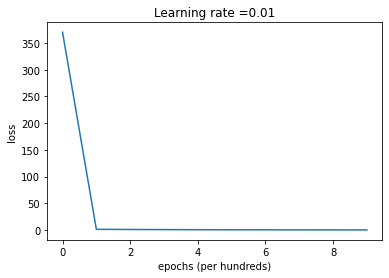

In [122]:
d = Run_Experiment(X_train, Y_train, X_test, Y_test, epochs = 1000, learning_rate = 0.01, print_loss = True)

# Plot learning curve (with costs)
losses = np.squeeze(d['losses'])
plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('epochs (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

## Part II: Experiment 2 ##
Health insurance is insurance that covers the whole or a part of the risk of a person incurring medical expenses, spreading the risk over a large number of persons. In this study, you will build a model to predict individual medical costs billed by health insurance.

### Load Data and Start the Learning Process ###
The dataset consists of 6 independent variables and 1 dependent variable (i.e., charges):
1.	Age: age of primary beneficiary.
2.	Sex: insurance contractor gender, female, male.
3.	BMI: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg/m^2) using the ratio of height to weight, ideally 18.5 to 24.9.
4.	Children: Number of children covered by health insurance/Number of dependents.
5.	Smoker: Is the person a smoker or not.
6.	Region: the beneficiary’s residential area in the US, northeast, southeast, southwest, northwest.
7.	Charges: Individual medical costs billed by health insurance.

In [126]:
# Prepare Train/Test data
df = pd.read_csv('encoded_insurance.csv', header=None, skiprows=1)

train_test_ratio = 0.7
range_train = int(len(df) * train_test_ratio)
X_train = df.iloc[:range_train, :-1]
Y_train = df.iloc[:range_train, -1]
X_test = df.iloc[range_train:, :-1]
Y_test = df.iloc[range_train:, -1]

X_train = X_train.values.T
Y_train = Y_train.values.reshape(1, -1)
X_test = X_test.values.T
Y_test = Y_test.values.reshape(1, -1)

### Plot the learning curve ###

Cost after iteration 0: 158328875.983145
Cost after iteration 100: 63738208.999642
Cost after iteration 200: 63490241.495607
Cost after iteration 300: 63285515.473764
Cost after iteration 400: 63106913.620044
Cost after iteration 500: 62946829.092954
Cost after iteration 600: 62801207.453104
Cost after iteration 700: 62667440.564101
Cost after iteration 800: 62543603.356426
Cost after iteration 900: 62428161.592078
train accuracy: -12.95 %
test accuracy: -12.29 %
W: 

[[3546.43]
 [3342.73]
 [ 184.39]
 [ -71.55]
 [ 196.63]
 [ 114.96]
 [  26.2 ]
 [ -10.56]
 [2730.8 ]
 [ -91.25]
 [ 209.96]
 [-179.58]]
<built-in method format of str object at 0x000001B87BFA3330>
-53.39374103451933


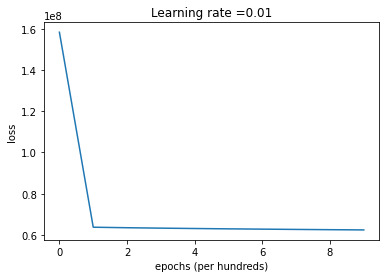

In [127]:
d = Run_Experiment(X_train, Y_train, X_test, Y_test, epochs = 1000, learning_rate = 0.01, print_loss = True)
# Plot learning curve (with costs)
losses = np.squeeze(d['losses'])
plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('epochs (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

### PartII-1 Feature Scaling -- normalize input features, i.e., independent variables ###
Oops, your algorithm is not learning. The learning curve is linearly increasing instead of decreasing. What's wrong with it?
You need to normalize the input as some features, e.g., age, may have very large values leading to exceeding the data ranges.
Please figure out where to call the "normalize" function to do the feature scaling.

### PartII-2 Normalize dependent variable ###
The accuracy is not good. Let's analyze the dependent variable's characteristics. It can be seen that the depedent varaible "charges" is not normal. However, normality is very important in statistics and linear regression. Please refer to the paper [THE IMPORTANCE OF THE NORMALITY ASSUMPTION IN LARGE PUBLIC HEALTH DATA SETS](https://www.annualreviews.org/doi/pdf/10.1146/annurev.publhealth.23.100901.140546#:~:text=Normality%20is%20not%20required%20to,confidence%20intervals%20and%20perform%20tests).

C:\Users\Donav\mambaforge\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of insurance charges')

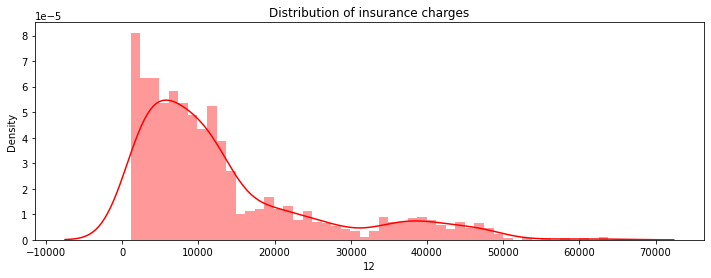

In [128]:
fig= plt.figure(figsize=(12,4))

ax=fig.add_subplot(111)
sns.distplot(df.iloc[:, -1],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

#### Using log transformation to make dependent variable normal ####

C:\Users\Donav\mambaforge\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


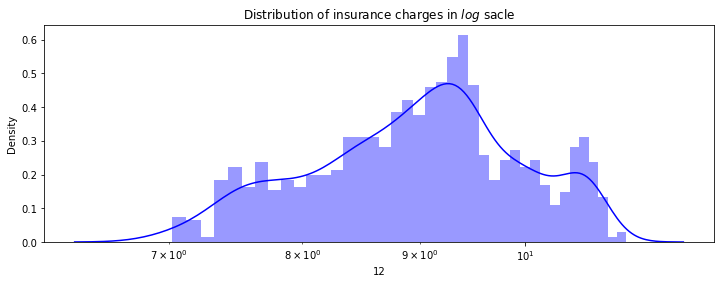

In [129]:
fig= plt.figure(figsize=(12,4))

ax=fig.add_subplot(111)
#Pay attention to the log
sns.distplot(np.log(df.iloc[:,-1]),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log');

In [130]:
### START YOUR CODE HERE ###
df = pd.read_csv('prj2data1.csv', header=None)
X_train = df[[0, 1]].values.T
Y_train = df[2].values.reshape(-1, 1).T
# #Normalize dependent variable using logarithm transformation
#X_train = normalize(X_train)
#X_test = normalize(X_test)
Y_train = np.log(Y_train)#normalize(Y_train)
Y_test = np.log(Y_test)
### YOUR CODE ENDS ###
#Normalize method among X values of Test and Train before fit method
d = Run_Experiment(X_train, Y_train, X_test, Y_test, epochs = 1000, learning_rate = 0.01, print_loss = True)
# Plot learning curve (with costs)
losses = np.squeeze(d['losses'])
plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('epochs (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

Cost after iteration 0: 5.105806
Cost after iteration 100: 0.527562
Cost after iteration 200: 0.209655
Cost after iteration 300: 0.119062
Cost after iteration 400: 0.074854
Cost after iteration 500: 0.048941
Cost after iteration 600: 0.032755
Cost after iteration 700: 0.022441
Cost after iteration 800: 0.015829
Cost after iteration 900: 0.011582


ValueError: shapes (1,2) and (12,402) not aligned: 2 (dim 1) != 12 (dim 0)